In [1]:
from google.colab import auth
auth.authenticate_user()

In [2]:
import numpy as np
import pandas as pd
import pandas_gbq

In [3]:
Feedback_data = pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Feedback`',project_id='surveyproject-378222', dialect='standard') 

Downloading: 100%|██████████|


In [4]:
Feedback_data

,ID,Feedback
0,317,No
1,116,No
2,111,na
3,267,no
4,263,sad
...,...,...
345,92,I am very disappointed with this program. The ...
346,196,I came to St. Clair college to gain experience...
347,114,I think there is a gap between the college off...
348,230,College should think of having 3 days per week...


#1) Normalization

In [5]:
import re
fdk = Feedback_data
def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].str.replace(r"@[A-Za-z0-9]+", "")  # remove Twitter usernames
    df[new_text_field_name] = df[new_text_field_name].str.replace(r"[^0-9A-Za-z \t]", "")  # remove non-alphanumeric characters
    df[new_text_field_name] = df[new_text_field_name].str.replace(r"http\S+", "")  # remove URLs
    df[new_text_field_name] = df[new_text_field_name].str.replace(r"^rt", "")  # remove retweet indicator
    df[new_text_field_name] = df[new_text_field_name].str.strip()  # remove leading/trailing whitespace 
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].str.replace('\d+', '') 
    return df
data_clean = clean_text(fdk , 'Feedback', 'text_clean')
data_clean.head()

<ipython-input-5-09e31bd14f19>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df[new_text_field_name] = df[new_text_field_name].str.replace(r"@[A-Za-z0-9]+", "")  # remove Twitter usernames
<ipython-input-5-09e31bd14f19>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df[new_text_field_name] = df[new_text_field_name].str.replace(r"[^0-9A-Za-z \t]", "")  # remove non-alphanumeric characters
<ipython-input-5-09e31bd14f19>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df[new_text_field_name] = df[new_text_field_name].str.replace(r"http\S+", "")  # remove URLs
<ipython-input-5-09e31bd14f19>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df[new_text_field_name] = df[new_text_field_name].str.replace(r"^rt", "")  # remove retweet indicator
<ipython-input-5-09e31bd14f19>:11: FutureWarning:

,ID,Feedback,text_clean
0,317,No,no
1,116,No,no
2,111,na,na
3,267,no,no
4,263,sad,sad


In [6]:
fdk


,ID,Feedback,text_clean
0,317,No,no
1,116,No,no
2,111,na,na
3,267,no,no
4,263,sad,sad
...,...,...,...
345,92,I am very disappointed with this program. The ...,i am very disappointed with this program the p...
346,196,I came to St. Clair college to gain experience...,i came to st clair college to gain experience ...
347,114,I think there is a gap between the college off...,i think there is a gap between the college off...
348,230,College should think of having 3 days per week...,college should think of having days per week ...


#2) Stop words

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]) if x is not None else '')
data_clean.head()

#data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,ID,Feedback,text_clean
0,317,No,
1,116,No,
2,111,na,na
3,267,no,
4,263,sad,sad


In [8]:
fdk

,ID,Feedback,text_clean
0,317,No,
1,116,No,
2,111,na,na
3,267,no,
4,263,sad,sad
...,...,...,...
345,92,I am very disappointed with this program. The ...,disappointed program professors seem expect st...
346,196,I came to St. Clair college to gain experience...,came st clair college gain experience meeting ...
347,114,I think there is a gap between the college off...,think gap college offering services students a...
348,230,College should think of having 3 days per week...,college think days per week also college follo...


#3) Tokenization

In [9]:
import nltk 
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_clean'].apply(lambda x: word_tokenize(x))
data_clean.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,ID,Feedback,text_clean,text_tokens
0,317,No,,[]
1,116,No,,[]
2,111,na,na,[na]
3,267,no,,[]
4,263,sad,sad,[sad]


In [10]:
fdk

,ID,Feedback,text_clean,text_tokens
0,317,No,,[]
1,116,No,,[]
2,111,na,na,[na]
3,267,no,,[]
4,263,sad,sad,[sad]
...,...,...,...,...
345,92,I am very disappointed with this program. The ...,disappointed program professors seem expect st...,"[disappointed, program, professors, seem, expe..."
346,196,I came to St. Clair college to gain experience...,came st clair college gain experience meeting ...,"[came, st, clair, college, gain, experience, m..."
347,114,I think there is a gap between the college off...,think gap college offering services students a...,"[think, gap, college, offering, services, stud..."
348,230,College should think of having 3 days per week...,college think days per week also college follo...,"[college, think, days, per, week, also, colleg..."


#4) Stemming

In [11]:
from nltk.stem import PorterStemmer 
def word_stemmer(Feedback):
    stem_text = [PorterStemmer().stem(i) for i in Feedback]
    return stem_text
data_clean['text_tokens_stem'] = data_clean['text_tokens'].apply(lambda x: word_stemmer(x))
data_clean.head()

,ID,Feedback,text_clean,text_tokens,text_tokens_stem
0,317,No,,[],[]
1,116,No,,[],[]
2,111,na,na,[na],[na]
3,267,no,,[],[]
4,263,sad,sad,[sad],[sad]


In [12]:
fdk

,ID,Feedback,text_clean,text_tokens,text_tokens_stem
0,317,No,,[],[]
1,116,No,,[],[]
2,111,na,na,[na],[na]
3,267,no,,[],[]
4,263,sad,sad,[sad],[sad]
...,...,...,...,...,...
345,92,I am very disappointed with this program. The ...,disappointed program professors seem expect st...,"[disappointed, program, professors, seem, expe...","[disappoint, program, professor, seem, expect,..."
346,196,I came to St. Clair college to gain experience...,came st clair college gain experience meeting ...,"[came, st, clair, college, gain, experience, m...","[came, st, clair, colleg, gain, experi, meet, ..."
347,114,I think there is a gap between the college off...,think gap college offering services students a...,"[think, gap, college, offering, services, stud...","[think, gap, colleg, offer, servic, student, a..."
348,230,College should think of having 3 days per week...,college think days per week also college follo...,"[college, think, days, per, week, also, colleg...","[colleg, think, day, per, week, also, colleg, ..."


#5) Lemmatization

In [13]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def word_lemmatizer(Feedback):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in Feedback]
    return lem_text
data_clean['text_tokens_lemma'] = data_clean['text_tokens'].apply(lambda x: word_lemmatizer(x))
data_clean.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


,ID,Feedback,text_clean,text_tokens,text_tokens_stem,text_tokens_lemma
0,317,No,,[],[],[]
1,116,No,,[],[],[]
2,111,na,na,[na],[na],[na]
3,267,no,,[],[],[]
4,263,sad,sad,[sad],[sad],[sad]


In [14]:
fdk

,ID,Feedback,text_clean,text_tokens,text_tokens_stem,text_tokens_lemma
0,317,No,,[],[],[]
1,116,No,,[],[],[]
2,111,na,na,[na],[na],[na]
3,267,no,,[],[],[]
4,263,sad,sad,[sad],[sad],[sad]
...,...,...,...,...,...,...
345,92,I am very disappointed with this program. The ...,disappointed program professors seem expect st...,"[disappointed, program, professors, seem, expe...","[disappoint, program, professor, seem, expect,...","[disappointed, program, professor, seem, expec..."
346,196,I came to St. Clair college to gain experience...,came st clair college gain experience meeting ...,"[came, st, clair, college, gain, experience, m...","[came, st, clair, colleg, gain, experi, meet, ...","[came, st, clair, college, gain, experience, m..."
347,114,I think there is a gap between the college off...,think gap college offering services students a...,"[think, gap, college, offering, services, stud...","[think, gap, colleg, offer, servic, student, a...","[think, gap, college, offering, service, stude..."
348,230,College should think of having 3 days per week...,college think days per week also college follo...,"[college, think, days, per, week, also, colleg...","[colleg, think, day, per, week, also, colleg, ...","[college, think, day, per, week, also, college..."


In [15]:
lemmatized_text=fdk['text_tokens_lemma']

In [16]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

## **Sentiment Analysis**

In [17]:
lemmatized_text

0                                                     []
1                                                     []
2                                                   [na]
3                                                     []
4                                                  [sad]
                             ...                        
345    [disappointed, program, professor, seem, expec...
346    [came, st, clair, college, gain, experience, m...
347    [think, gap, college, offering, service, stude...
348    [college, think, day, per, week, also, college...
349    [class, schedule, student, centric, also, work...
Name: text_tokens_lemma, Length: 350, dtype: object

In [18]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Instantiate the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define a function to apply the sentiment analyzer to each row of text
def get_sentiment_score(text):
    text_str = ' '.join(text)
    return sia.polarity_scores(text_str)['compound']


# Drop the rows containing None values in the 'text_tokens_lemma' column
fdk = fdk.dropna(subset=['text_tokens_lemma'])

# Apply the function to the 'text_tokens_lemma' column and create a new column with the sentiment scores
fdk['sentiment_score'] = fdk['text_tokens_lemma'].apply(get_sentiment_score)

# Group the DataFrame by the unique identifier and calculate the mean sentiment score for each group
grouped = fdk.groupby('ID')['sentiment_score'].mean()

# Print the group-wise sentiment scores
for ID, score in grouped.items():
    if score > 0:
        print('The text with unique id {} has a positive sentiment score of {:.2f}.'.format(ID, score))
    elif score < 0:
        print('The text with unique id {} has a negative sentiment score of {:.2f}.'.format(ID, score))
    else:
        print('The text with unique id {} has a neutral sentiment score of {:.2f}.'.format(ID, score))


The text with unique id 1 has a negative sentiment score of -0.32.
The text with unique id 2 has a neutral sentiment score of 0.00.
The text with unique id 3 has a neutral sentiment score of 0.00.
The text with unique id 4 has a neutral sentiment score of 0.00.
The text with unique id 5 has a neutral sentiment score of 0.00.
The text with unique id 6 has a neutral sentiment score of 0.00.
The text with unique id 7 has a neutral sentiment score of 0.00.
The text with unique id 8 has a neutral sentiment score of 0.00.
The text with unique id 9 has a neutral sentiment score of 0.00.
The text with unique id 10 has a positive sentiment score of 0.03.
The text with unique id 11 has a neutral sentiment score of 0.00.
The text with unique id 12 has a neutral sentiment score of 0.00.
The text with unique id 13 has a negative sentiment score of -0.19.
The text with unique id 14 has a neutral sentiment score of 0.00.
The text with unique id 15 has a neutral sentiment score of 0.00.
The text with 

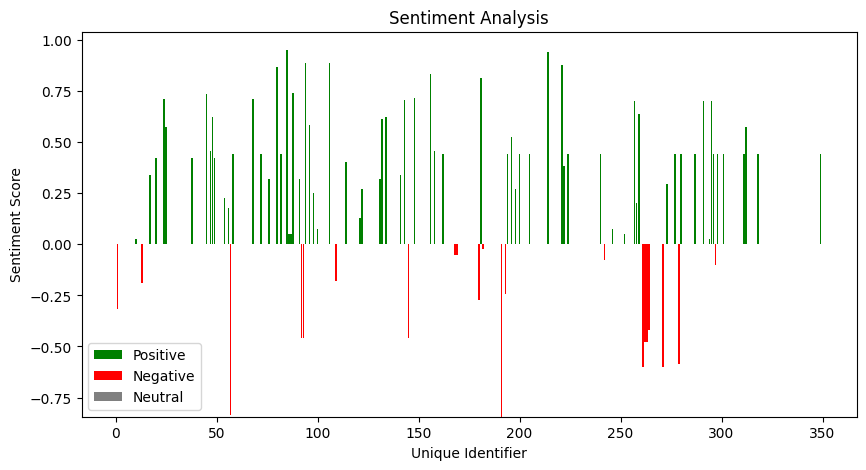

In [22]:
#Create a new DataFrame with the sentiment scores for positive, negative and neutral texts
sentiment_df = pd.DataFrame({
'positive': grouped[grouped > 0],
'negative': grouped[grouped < 0],
'neutral': grouped[grouped == 0]
})

#Sort the DataFrame by the index (i.e., the unique identifier)
sentiment_df = sentiment_df.sort_index()

#Plot the sentiment scores as a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(sentiment_df.index, sentiment_df['positive'], color='green', label='Positive')
ax.bar(sentiment_df.index, sentiment_df['negative'], color='red', label='Negative')
ax.bar(sentiment_df.index, sentiment_df['neutral'], color='gray', label='Neutral', bottom=sentiment_df['negative'])

ax.set_xlabel('Unique Identifier')
ax.set_ylabel('Sentiment Score')
ax.set_title('Sentiment Analysis')
ax.legend()

plt.show()